In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
from glob import glob

In [6]:
femalepath=glob('./SUBSET DATA/female/*.jpg')
malepath=glob('./SUBSET DATA/male/*.jpg')

In [7]:
femalepath

['./SUBSET DATA/female\\female_000000.jpg',
 './SUBSET DATA/female\\female_000001.jpg',
 './SUBSET DATA/female\\female_000002.jpg',
 './SUBSET DATA/female\\female_000003.jpg',
 './SUBSET DATA/female\\female_000004.jpg',
 './SUBSET DATA/female\\female_000005.jpg',
 './SUBSET DATA/female\\female_000006.jpg',
 './SUBSET DATA/female\\female_000007.jpg',
 './SUBSET DATA/female\\female_000008.jpg',
 './SUBSET DATA/female\\female_000009.jpg',
 './SUBSET DATA/female\\female_000010.jpg',
 './SUBSET DATA/female\\female_000011.jpg',
 './SUBSET DATA/female\\female_000012.jpg',
 './SUBSET DATA/female\\female_000013.jpg',
 './SUBSET DATA/female\\female_000014.jpg',
 './SUBSET DATA/female\\female_000015.jpg',
 './SUBSET DATA/female\\female_000016.jpg',
 './SUBSET DATA/female\\female_000017.jpg',
 './SUBSET DATA/female\\female_000018.jpg',
 './SUBSET DATA/female\\female_000019.jpg',
 './SUBSET DATA/female\\female_000020.jpg',
 './SUBSET DATA/female\\female_000021.jpg']

In [8]:
len(femalepath)
len(malepath)

22

In [11]:
firstfemalepath=femalepath[0]
img=cv2.imread(firstfemalepath)
img.shape # first female image size 489*490

(489, 490, 3)

In [10]:
img

array([[[196, 152, 135],
        [196, 152, 135],
        [196, 152, 135],
        ...,
        [251, 237, 239],
        [252, 238, 240],
        [251, 237, 239]],

       [[198, 154, 137],
        [198, 154, 137],
        [198, 154, 137],
        ...,
        [251, 237, 239],
        [252, 238, 240],
        [251, 237, 239]],

       [[200, 155, 141],
        [200, 155, 141],
        [200, 155, 141],
        ...,
        [251, 237, 239],
        [252, 238, 240],
        [252, 238, 240]],

       ...,

       [[253, 254, 252],
        [253, 254, 252],
        [253, 254, 252],
        ...,
        [139, 158, 195],
        [139, 158, 195],
        [139, 158, 195]],

       [[255, 255, 254],
        [255, 255, 254],
        [255, 255, 254],
        ...,
        [145, 164, 201],
        [147, 166, 203],
        [147, 166, 203]],

       [[252, 253, 251],
        [252, 253, 251],
        [252, 253, 251],
        ...,
        [143, 162, 199],
        [142, 161, 198],
        [142, 161, 198]]

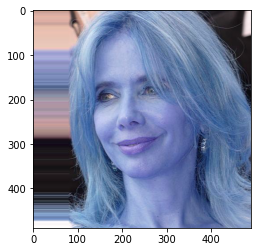

In [12]:
plt.imshow(img)
plt.show()

In [13]:
#convert to grayscale.
img_gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img_gray.shape

(489, 490)

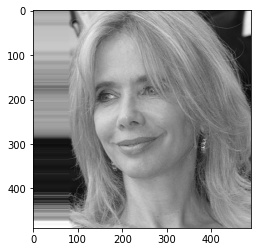

In [14]:
plt.imshow(img_gray,cmap='gray')

In [15]:
#load haar cascade classifier
haar=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
faces=haar.detectMultiScale(img_gray,1.5,5)
print(faces)

[[ 86  86 273 273]]


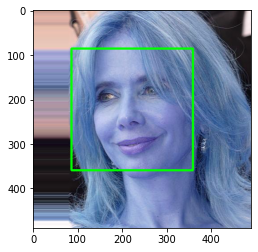

In [17]:
 #create rectangle.
for x,y,w,h in faces:
    cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),3)#3 represent the thickness of green color boundary
plt.imshow(img)

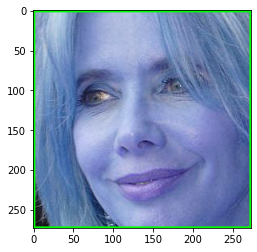

In [18]:
crop_img=img[y:y+h,x:x+h]
plt.imshow(crop_img)

In [19]:
#save the final crop first final image.
cv2.imwrite('f_01.png',crop_img)

True

(489, 490, 3)
(425, 426, 3)
(500, 500, 3)
(130, 130, 3)
(262, 262, 3)
(147, 147, 3)
(280, 279, 3)
(86, 86, 3)
(163, 162, 3)
(148, 148, 3)
(185, 185, 3)
(76, 76, 3)
(141, 141, 3)
(457, 456, 3)
(323, 322, 3)
(86, 86, 3)
(1, 1, 3)
(114, 114, 3)
(398, 397, 3)
(424, 424, 3)
(346, 346, 3)
(163, 164, 3)


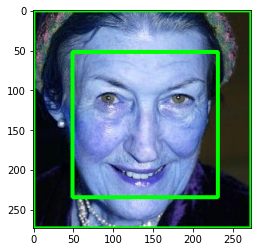

In [31]:
# Apply same technique to all the images.
for index, f  in enumerate (femalepath):
   # print(f)
    print(cv2.imread(f).shape)
    img=cv2.imread(f)
    img_gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    haar=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
    faces=haar.detectMultiScale(img_gray,1.5,5)
    for x,y,w,h in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),3)
        cropimg=img[y:y+h,x:x+h]
        plt.imshow(cropimg)
        cv2.imwrite('f_'+str(index)+'.png',cropimg)
    #break

In [37]:
# using function another method
def extractandsave(path,gender,i):
    img=cv2.imread(path)
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=haar.detectMultiScale(gray,1.5,5)
    for x,y,w,h in faces:
        cropimgg=img[y:y+h,x:x+w]
        if gender=='male':
            cv2.imwrite('./output_crop/cropmale/{}_{}.png'.format(gender,i),cropimgg)
        else:
            cv2.imwrite('./output_crop/cropfemale/{}_{}.png'.format(gender,i),cropimgg)
    

In [38]:
for i,path in enumerate(femalepath):
    try:
        extractandsave(path,'female',i)
        print("processed",path)
    except:
        print("except.")

processed ./SUBSET DATA/female\female_000000.jpg
processed ./SUBSET DATA/female\female_000001.jpg
processed ./SUBSET DATA/female\female_000002.jpg
processed ./SUBSET DATA/female\female_000003.jpg
processed ./SUBSET DATA/female\female_000004.jpg
processed ./SUBSET DATA/female\female_000005.jpg
processed ./SUBSET DATA/female\female_000006.jpg
processed ./SUBSET DATA/female\female_000007.jpg
processed ./SUBSET DATA/female\female_000008.jpg
processed ./SUBSET DATA/female\female_000009.jpg
processed ./SUBSET DATA/female\female_000010.jpg
processed ./SUBSET DATA/female\female_000011.jpg
processed ./SUBSET DATA/female\female_000012.jpg
processed ./SUBSET DATA/female\female_000013.jpg
processed ./SUBSET DATA/female\female_000014.jpg
processed ./SUBSET DATA/female\female_000015.jpg
processed ./SUBSET DATA/female\female_000016.jpg
processed ./SUBSET DATA/female\female_000017.jpg
processed ./SUBSET DATA/female\female_000018.jpg
processed ./SUBSET DATA/female\female_000019.jpg
processed ./SUBSET D

In [39]:
for i,path in enumerate (malepath):
    try:
        extractandsave(path,'male',i)
        print("proceed",path)
    except:
        print("extract")
    

proceed ./SUBSET DATA/male\male_000000.jpg
proceed ./SUBSET DATA/male\male_000001.jpg
proceed ./SUBSET DATA/male\male_000002.jpg
proceed ./SUBSET DATA/male\male_000003.jpg
proceed ./SUBSET DATA/male\male_000004.jpg
proceed ./SUBSET DATA/male\male_000005.jpg
proceed ./SUBSET DATA/male\male_000006.jpg
proceed ./SUBSET DATA/male\male_000007.jpg
proceed ./SUBSET DATA/male\male_000008.jpg
proceed ./SUBSET DATA/male\male_000009.jpg
proceed ./SUBSET DATA/male\male_000010.jpg
proceed ./SUBSET DATA/male\male_000011.jpg
proceed ./SUBSET DATA/male\male_000012.jpg
proceed ./SUBSET DATA/male\male_000013.jpg
proceed ./SUBSET DATA/male\male_000014.jpg
proceed ./SUBSET DATA/male\male_000015.jpg
proceed ./SUBSET DATA/male\male_000016.jpg
proceed ./SUBSET DATA/male\male_000017.jpg
proceed ./SUBSET DATA/male\male_000018.jpg
proceed ./SUBSET DATA/male\male_000019.jpg
proceed ./SUBSET DATA/male\male_000020.jpg
proceed ./SUBSET DATA/male\male_000021.jpg
